# 시계열 데이터? --> RNN, LSTM, GRU

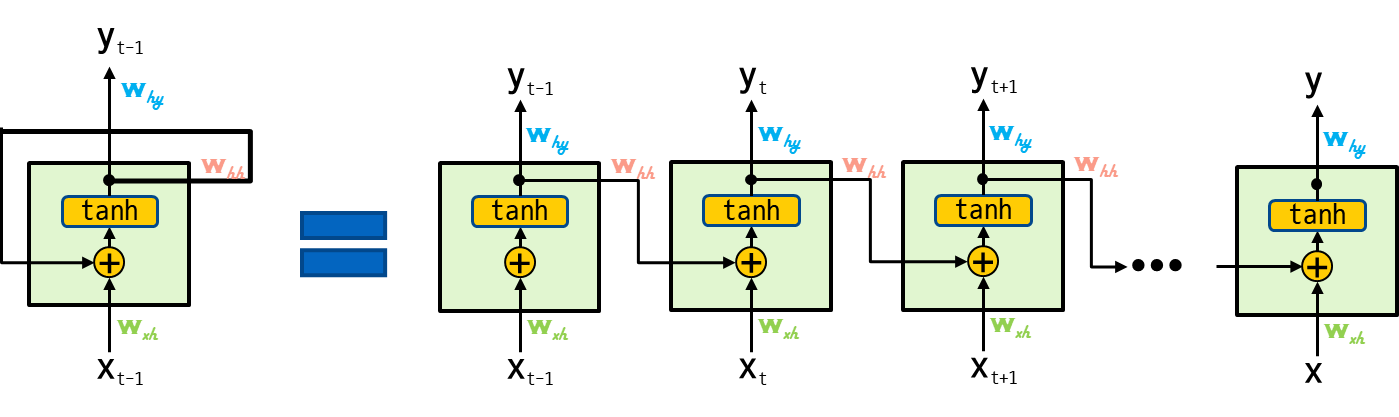

## 시간의 흐름에 따라 순서대로 나열된 데이터
### 1️⃣ 일상생활 속 시계열 데이터 예시
* 📊 일주일 동안의 기온 변화
* 💰 한 달 동안의 용돈 사용 내역
* 📏 1년 동안의 키 성장 기록

### 2️⃣ 문장의 시계열성
단어의 위치만 바꾸어도 전혀 다른 의미가 되는 예시:

| 문장 | 의미 |
|------|------|
| "나는 밥**만** 먹었다" | 다른 것은 안 먹고 밥만 먹음 |
| "나**만** 밥을 먹었다" | 다른 사람은 안 먹고 나만 먹음 |

### 3️⃣ 단어도 시계열성
같은 알파벳으로 구성되지만, 순서에 따라 다른 의미를 가지는 단어들:

| 단어 | 의미 |
|------|------|
| NOW | 지금, 현재 |
| WON | 이기다 (win의 과거형) |
| OWN | 소유하다, 자신의 것 |

### 🔑 핵심 포인트
모든 경우에서 **순서**가 바뀌면 의미가 달라지거나 의미가 없어질 수 있음

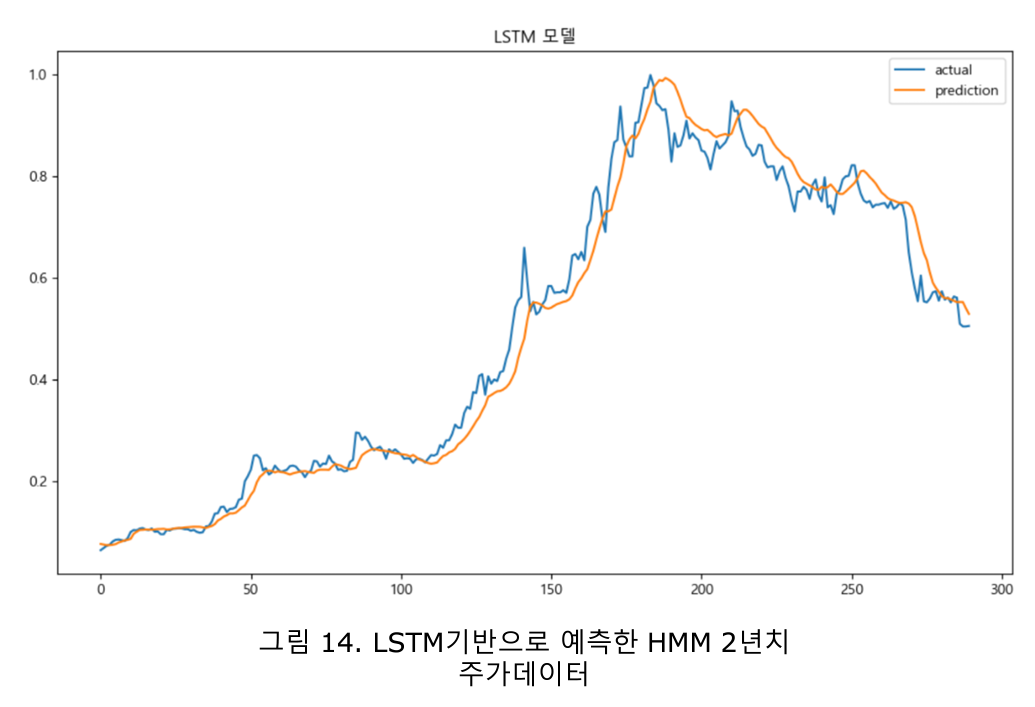

## 시계열 데이터의 특징
## 1. 시간 의존성 (Time Dependency)
> "오늘의 날씨는 어제의 날씨와 관련이 있다"
- 시간순서대로 수집된 데이터는 서로 연관되어 있습니다.(현재 시점의 데이터는 과거 데이터의 영향을 받습니다.)
- 예: 주식 가격, 기온 변화, 판매량 등

## 2. 주기성 (Seasonality)
> "일년에 한번씩 크리스마스 시즌에는 선물 판매량이 늘어난다"
- 정해진 주기로 반복되는 패턴을 보입니다(일별, 주별, 월별, 연도별 등 다양한 주기가 있습니다)
- 예:
 - 커피숍의 하루 매출 (아침/점심/저녁 피크)
 - 백화점의 주간 매출 (주말 증가)
 - 아이스크림 판매량 (여름 증가)

## 3. 추세 (Trend)
> "인구수는 계속해서 늘어나는 추세를 보인다"
- 장기적으로 보았을 때 전반적인 증가/감소 경향을 보입니다.(데이터가 특정 방향으로 움직이는 경향을 말합니다)
- 예:
 - 전기차 판매량의 증가 추세
 - 스마트폰 사용자 수의 증가 추세
 - 특정 상품의 가격 하락 추세

## 4. 노이즈 (Noise)
> "매출은 전반적으로 증가하지만, 어떤 날은 갑자기 확 줄어들기도 한다"
- 예측할 수 없는 불규칙한 변동이 존재합니다.(데이터에 포함된 무작위적인 변화를 의미합니다.)
- 예:
 - 갑작스러운 날씨 변화로 인한 매출 감소
 - 특별한 이유 없는 주가 변동
 - 센서 측정값의 오차

## 5. 정상성 (Stationarity)
> "여름철 아이스크림 평균 판매량은 매년 비슷하다"
- 시간이 지나도 평균과 분산이 크게 변하지 않습니다.(안정적인 패턴을 보이는 데이터의 특성입니다)
- 예:
 - 연간 계절별 기온 변화
 - 하루 중 시간대별 교통량
 - 주간 요일별 매출 패턴

## 6. 순차적 특성 (Sequential Nature)
> "시험 성적의 변화를 볼 때는 반드시 시간 순서대로 봐야 한다"
- 데이터의 순서가 매우 중요합니다.(순서를 섞으면 의미가 달라집니다)
- 예:
 - 학습 과정에서의 실력 변화
 - 질병의 증상 진행 과정
 - 제품의 품질 변화 추이

이러한 특징들을 이해하면 시계열 데이터를 더 잘 분석하고 예측할 수 있습니다.

# RNN(순환신경망)으로 주기성과 패턴이 있는 값 예측(회귀)

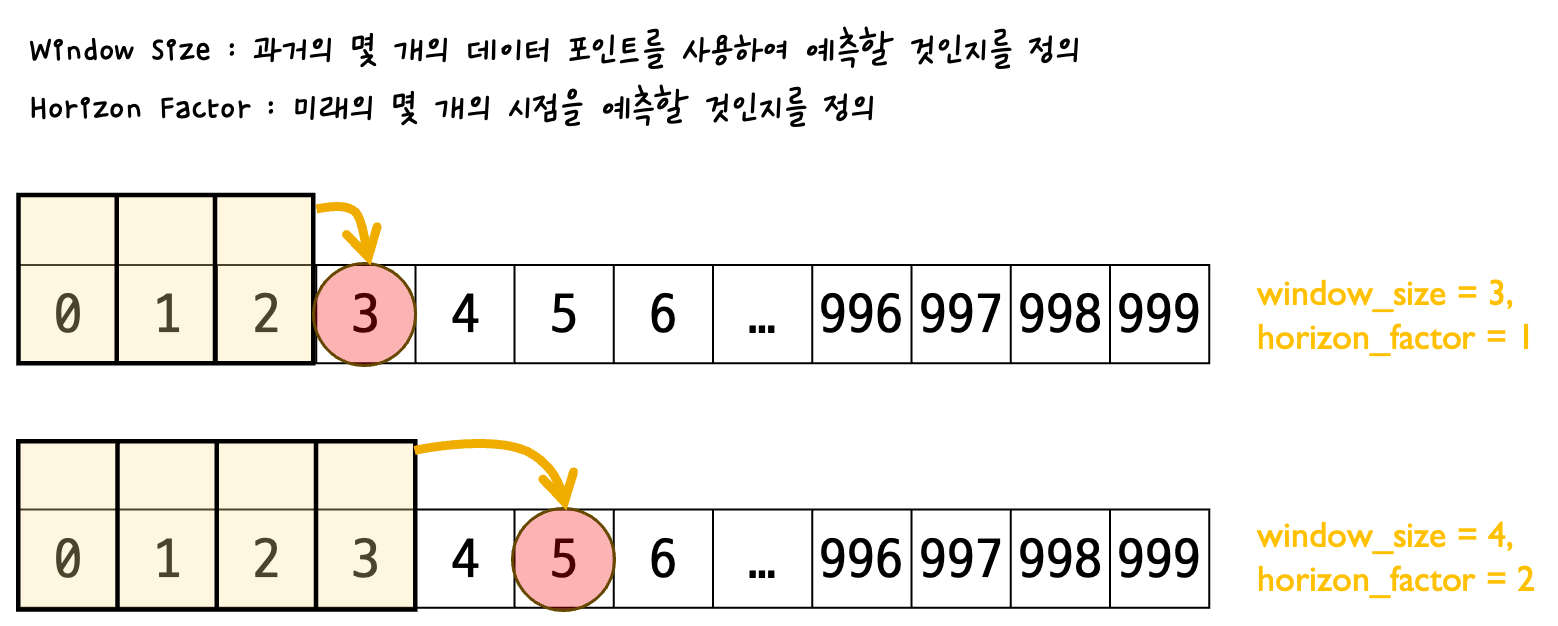

## 데이터 생성

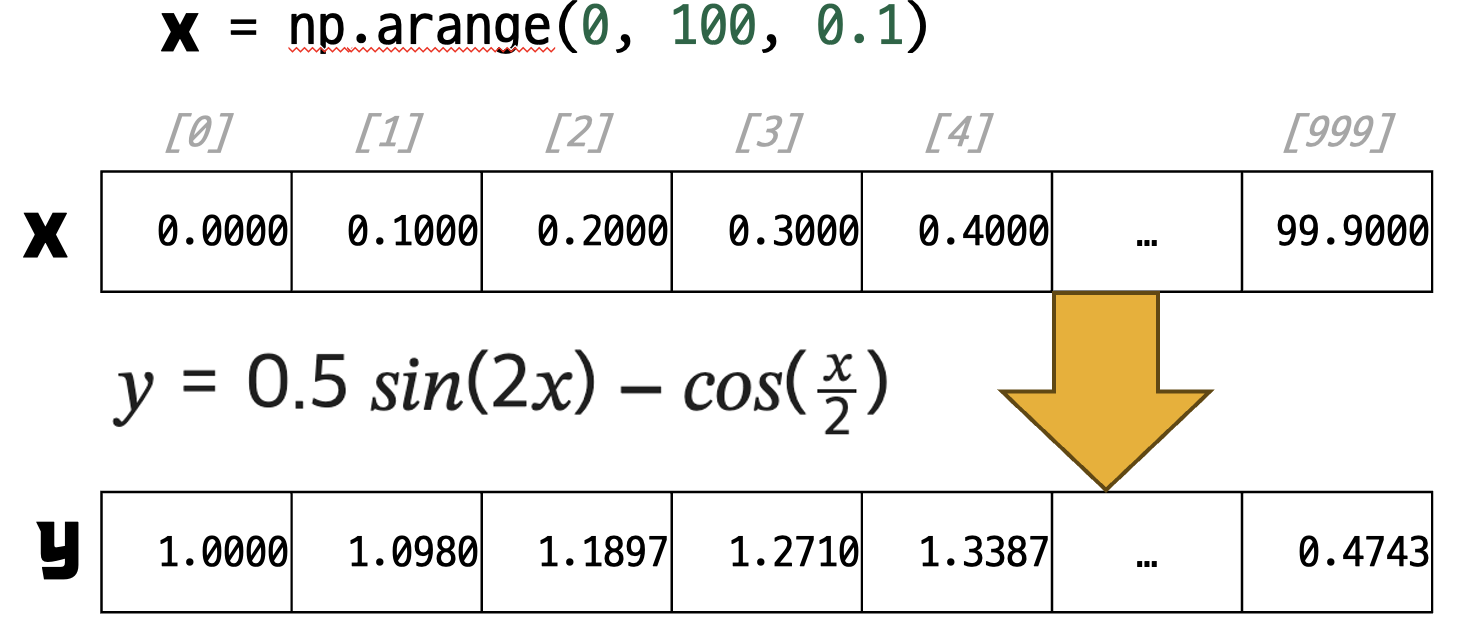

In [ ]:
import numpy as np

x = np.arange(0, 100, 0.1)

y = 0.5 * np.sin(2 * x) + np.cos(x / 2)

In [ ]:
print(x.shape)
print(x[:5])
print(x[999])

(1000,)
[0.  0.1 0.2 0.3 0.4]
99.9


In [ ]:
print(y.shape)
print(y[:5])
print(y[999])

(1000,)
[1.         1.09808493 1.18971334 1.27109231 1.33874462]
0.47430742356127453


## 생성된 데이터 시각화(주기성, 패턴 등을 가진 데이터 생성)

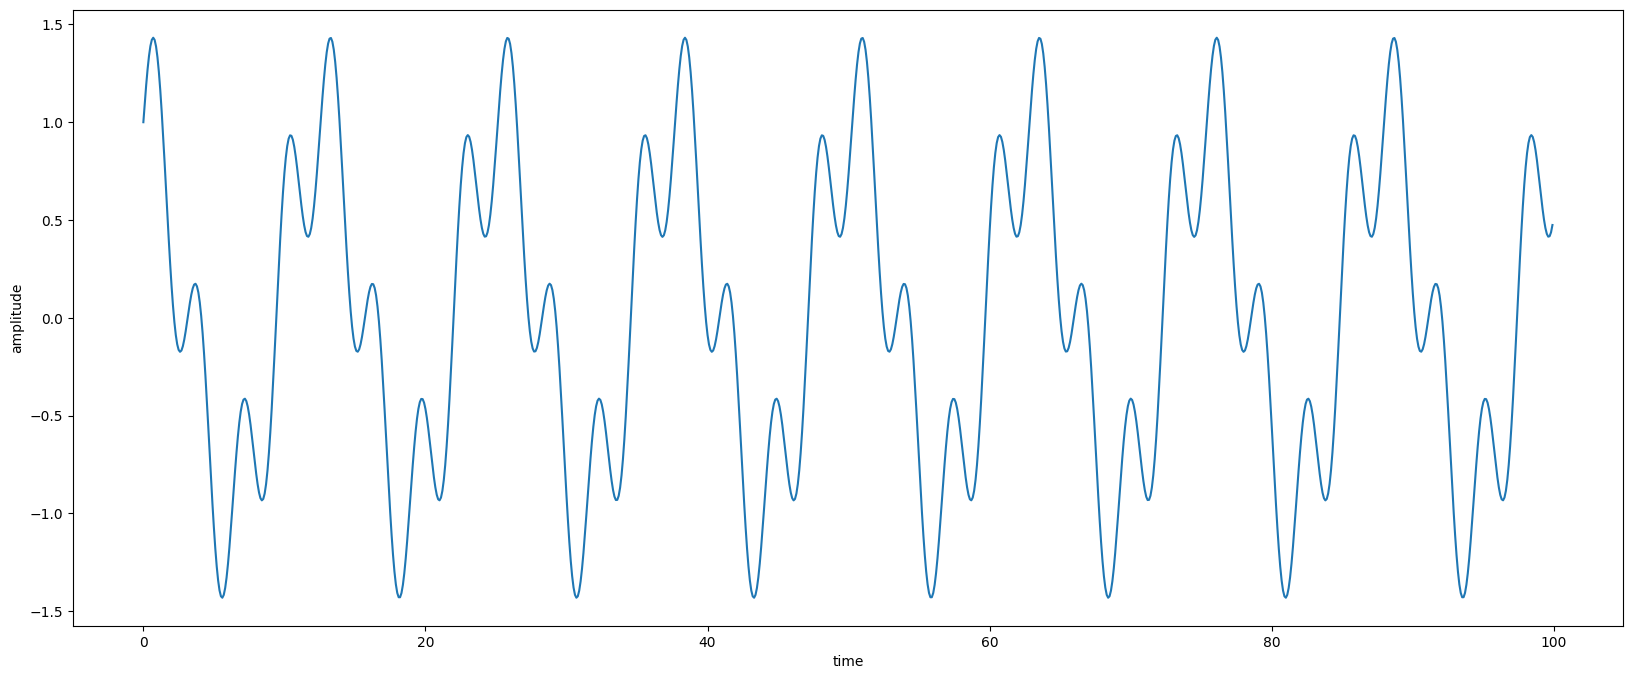

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(x, y)

plt.show()

## Keras의 RNN의 학습 데이터는 3차원 데이터 셋을 요구한다.

In [ ]:
print(y.shape)

seq = y.reshape(1000, 1)

print(seq.shape)

(1,)


ValueError: cannot reshape array of size 1 into shape (1000,1)

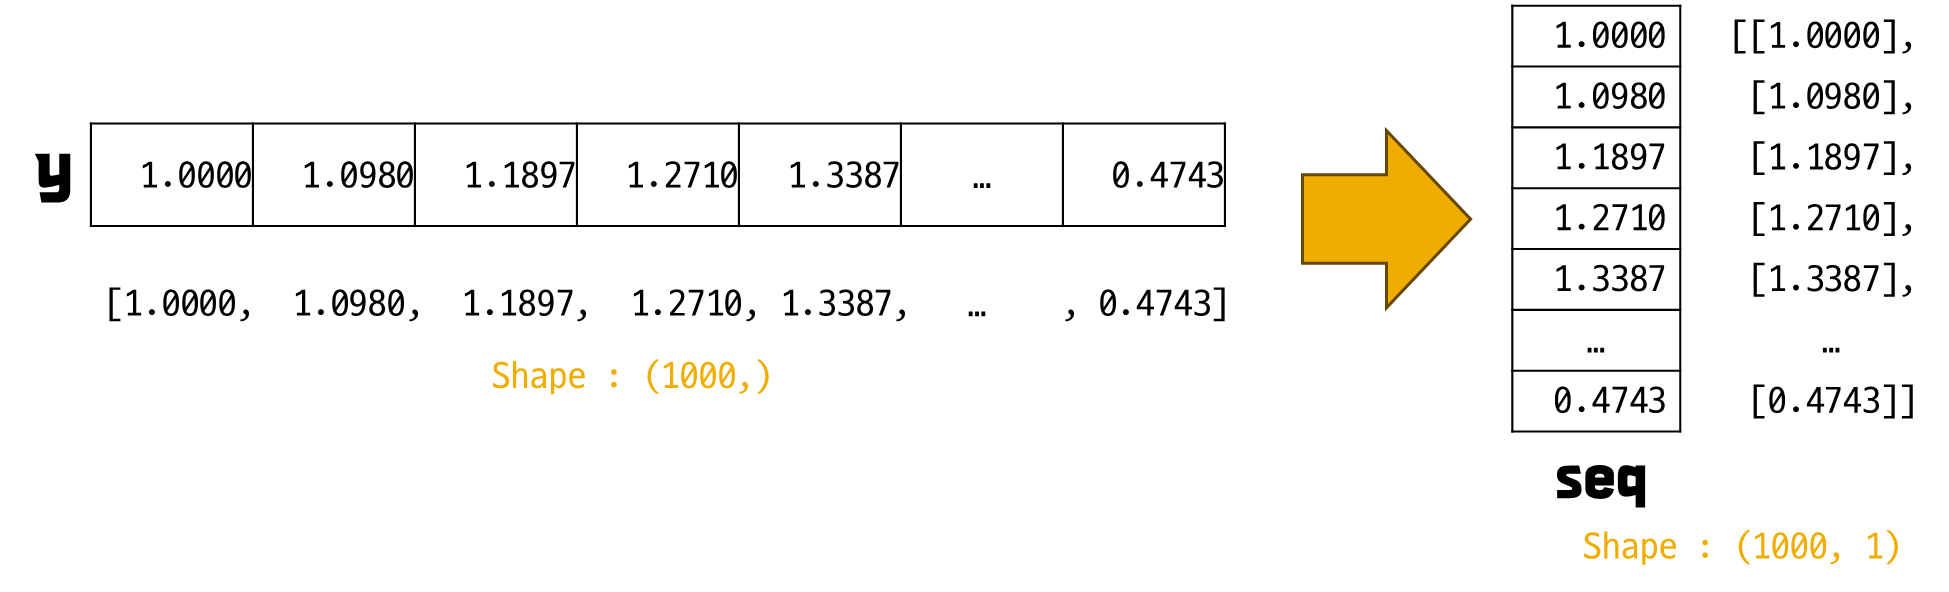

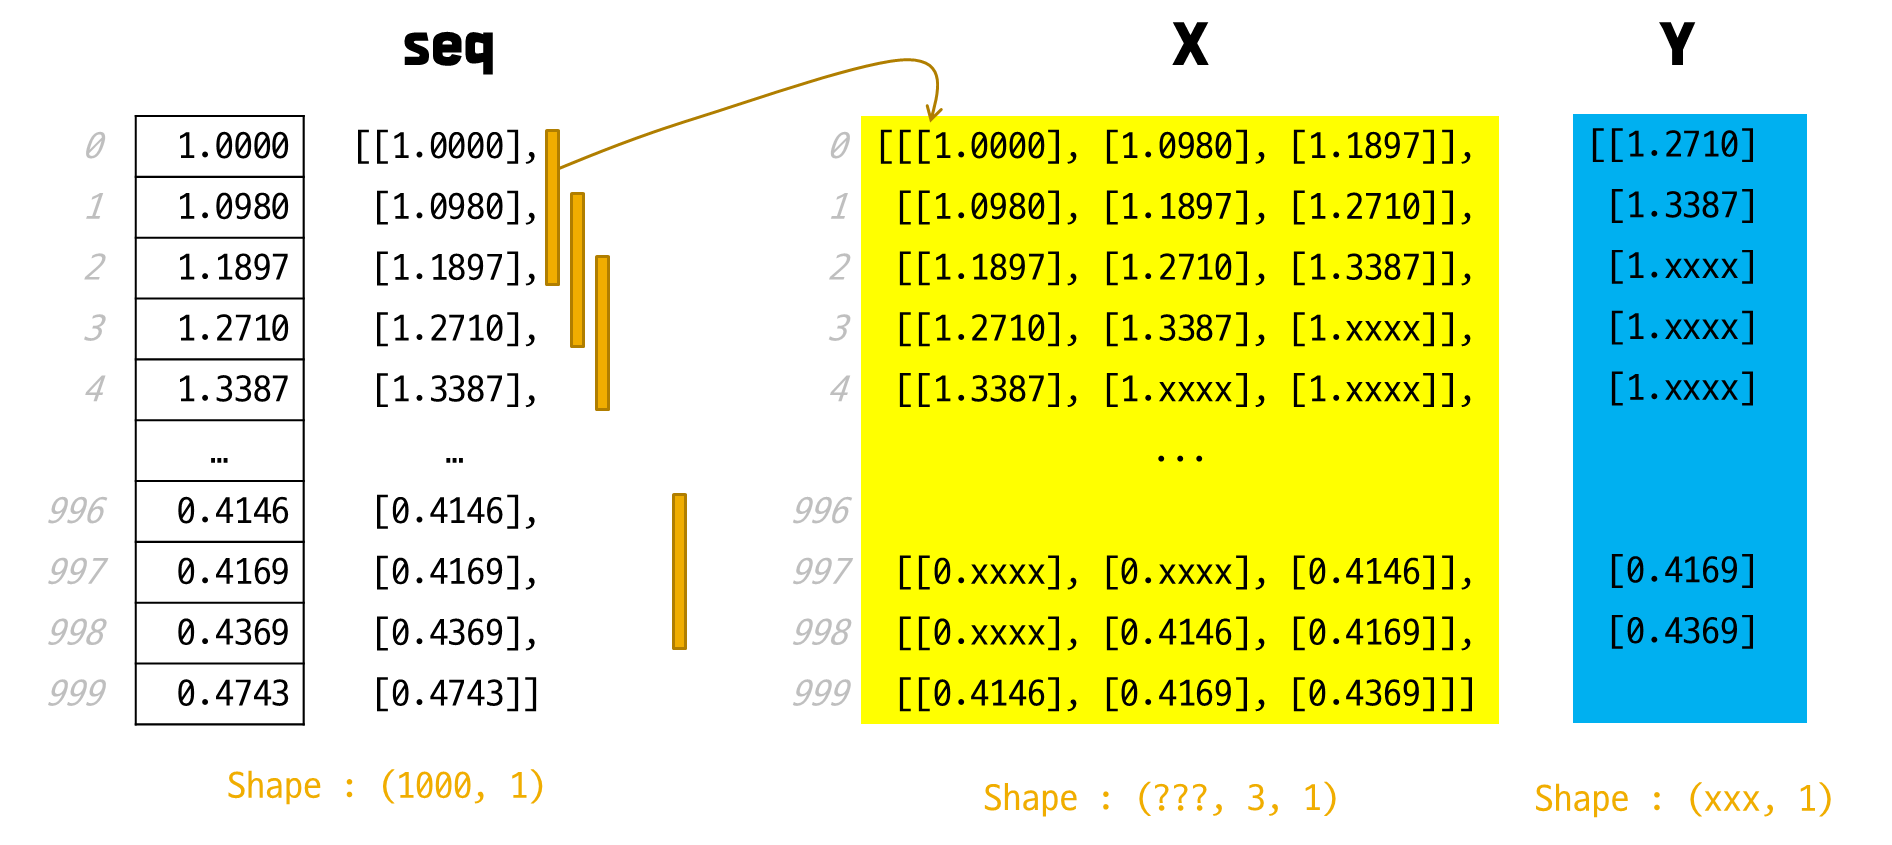

In [ ]:
w = 3      # window size
h = 1       # horizon factor

X = []
Y = []

for i in range(len(seq)-(w + h) + 1):
    x = seq[i : i + w]
    y = seq[i + w + h - 1]

    X.append(x)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

print(X.shape, Y.shape)

## 데이터(X, Y)를 훈련용(80%) : 평가용(20%)로 분리

In [ ]:
split_ratio = 0.8

split = int(split_ratio * len(X))

train_X = X[0:split]
train_Y = Y[0:split]

test_X = X[split:]
test_Y = Y[split:]

### > 왜 무작위로 섞지 않았을까???

## 모델 개발(훈련 데이터로 모델 개발)

In [ ]:
import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(units=128, activation='tanh',input_shape=(3, 1)))

model.add(keras.layers.Dense(1))

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
hist = model.fit(train_X, train_Y, epochs=100, validation_data=(test_X, test_Y))

## 평가 데이터 예측해 보기

In [ ]:
pred = model.predict(test_X)

print(pred.shape)

In [ ]:
rand_idx = np.random.randint(0, len(y_test), size=5)

print('랜덤 인덱스 = ',rand_idx, '\n')

print('예측값 = ', pred.flatten()[rand_idx])
print('실제값 = ', test_X.flatten()[rand_idx])

print('오차값 = ', test_Y.flatten()[rand_idx] - pred.flatten()[rand_idx])

## 평가 데이터 시각화

In [ ]:
plt.plot(pred, label='prediction', linewidth="15")
plt.plot(test_Y, label='label', linewidth="3")
plt.grid()

plt.show()

## 코드 종합(window_size=3)

In [ ]:
import numpy as np
import keras

# 데이터 생성
x = np.arange(0, 100, 0.1)
y = 0.5 * np.sin(2 * x) + np.cos(x / 2)

# 2차원 배열로 : (1000,) --> (1000, 1)
seq = y.reshape(-1, 1)

w = 3      # window size
h = 1       # horizon factor


# RNN 학습을 위한 데이터 셋으로 변경
X, Y = [], []
for i in range(len(seq)-(w + h) + 1):
    x = seq[i : i + w]
    y = seq[i + w + h - 1]

    X.append(x)
    Y.append(y)

X = np.array(X) # 파이썬 리스트를 넘파이 배열로 변환
Y = np.array(Y)


# 훈련 데이터와 평가 데이터로 분리
split_ratio = 0.8

split = int(split_ratio * len(X))

train_X = X[0:split]
train_Y = Y[0:split]

test_X = X[split:]
test_Y = Y[split:]


# 모델 생성
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(units=128, activation='tanh',input_shape=(3,1)))
model.add(keras.layers.Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 모델 훈련
hist = model.fit(train_X, train_Y, epochs=100, validation_data=(test_X, test_Y))

In [ ]:
pred = model.predict(test_X)

print(pred.shape)

In [ ]:
plt.plot(pred, label='prediction', linewidth="15")
plt.plot(test_Y, label='label', linewidth="3")
plt.grid()

plt.show()

## 코드 종합(window_size=20)

In [ ]:
import numpy as np
import keras

# 데이터 생성
x = np.arange(0, 100, 0.1)
y = 0.5 * np.sin(2 * x) + np.cos(x / 2)

# 2차원 배열로 : (1000,) --> (1000, 1)
seq = y.reshape(-1, 1)

w = 20      # window size
h = 1       # horizon factor


# RNN 학습을 위한 데이터 셋으로 변경
X, Y = [], []
for i in range(len(seq)-(w + h) + 1):
    x = seq[i : i + w]
    y = seq[i + w + h - 1]

    X.append(x)
    Y.append(y)

X = np.array(X) # 파이썬 리스트를 넘파이 배열로 변환
Y = np.array(Y)


# 훈련 데이터와 평가 데이터로 분리
split_ratio = 0.8

split = int(split_ratio * len(X))

train_X = X[0:split]
train_Y = Y[0:split]

test_X = X[split:]
test_Y = Y[split:]


# 모델 생성
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(units=128, activation='tanh',input_shape=(20, 1)))
model.add(keras.layers.Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 모델 훈련
hist = model.fit(train_X, train_Y, epochs=100, validation_data=(test_X, test_Y))

In [ ]:
pred = model.predict(test_X)

print(pred.shape)

In [ ]:
plt.plot(pred, label='prediction', linewidth="15")
plt.plot(test_Y, label='label', linewidth="3")
plt.grid()

plt.show()